In [87]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format

In [88]:
#csv파일을 불러온다
rock_samples = pd.read_csv("C:/Users/EL11/dataschool/rocksamples.csv") #이과정에서 오류가 났는데 경로 복사할때 '\'로 들어가서 수기로 '/'로 고쳐줌

In [89]:
#데이터프레임 살펴보기 1. 위에서 부터 5개
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.80,88.36
1,10002,Apollo11,Soil,Unsieved,5629.00,93.73
2,10003,Apollo11,Basalt,Ilmenite,213.00,65.56
3,10004,Apollo11,Core,Unsieved,44.80,71.76
4,10005,Apollo11,Core,Unsieved,53.40,40.31


In [90]:
#데이터프레임 살펴보기 1. 밑에서 부터 5개
rock_samples.tail()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
2224,79528,Apollo17,Breccia,Regolith,2.38,100.00
2225,79529,Apollo17,Breccia,Regolith,1.84,100.00
2226,79535,Apollo17,Breccia,Regolith,1.69,100.00
2227,79536,Apollo17,Breccia,Regolith,1.66,100.00
2228,79537,Apollo17,Breccia,Regolith,1.05,100.00


In [91]:
rock_samples.info()
#Column 아래로 INDEX
#Dtype은 데이터 타입관련, 가장 아래 dytypes는 각 컬럼의 데이터 타입
#(total 6 columns)_전체 행수
#Memory usage 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [92]:
rock_samples.describe()

,ID,Weight (g),Pristine (%)
count,2229.00,2229.00,2229.00
mean,52058.43,168.25,84.51
std,26207.65,637.29,22.06
min,10001.00,0.00,0.00
25%,15437.00,3.00,80.01
50%,65527.00,10.20,92.30
75%,72142.00,93.49,98.14
max,79537.00,11729.00,180.00


In [93]:
#누락값 검사
rock_samples.isnull().sum()

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64

In [94]:
rock_samples.isnull()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2224,False,False,False,False,False,False
2225,False,False,False,False,False,False
2226,False,False,False,False,False,False
2227,False,False,False,False,False,False


열단위 데이터 추출

In [95]:
sample_series = rock_samples['Weight (g)']
sample_series

0       125.80
1      5629.00
2       213.00
3        44.80
4        53.40
         ...  
2224      2.38
2225      1.84
2226      1.69
2227      1.66
2228      1.05
Name: Weight (g), Length: 2229, dtype: float64

In [96]:
sample_df = rock_samples[['Type','Weight (g)']]
sample_df

,Type,Weight (g)
0,Soil,125.80
1,Soil,5629.00
2,Basalt,213.00
3,Core,44.80
4,Core,53.40
...,...,...
2224,Breccia,2.38
2225,Breccia,1.84
2226,Breccia,1.69
2227,Breccia,1.66


In [97]:
rock_samples['Weight (kg)'] = rock_samples['Weight (g)'] / 1000

람다lambda 함수도 사용가능하다

단위가 g에서 kg로 바뀐것을 알 수 있다.

In [98]:
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg)
0,10001,Apollo11,Soil,Unsieved,125.80,88.36,0.13
1,10002,Apollo11,Soil,Unsieved,5629.00,93.73,5.63
2,10003,Apollo11,Basalt,Ilmenite,213.00,65.56,0.21
3,10004,Apollo11,Core,Unsieved,44.80,71.76,0.04
4,10005,Apollo11,Core,Unsieved,53.40,40.31,0.05


In [99]:
missions = pd.DataFrame() #빈데이터 프레임을 만들어 missions 라는 변수에 할당
missions

""


In [100]:
type(missions)

pandas.core.frame.DataFrame

In [101]:
type(rock_samples['Mission'])

pandas.core.series.Series

In [102]:
rock_samples['Mission'].unique() #Series.unique()는 시리즈에서 고유한 값들을 찾아주는 명령어

array(['Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16',
       'Apollo17'], dtype=object)

In [103]:
missions['Mission'] = rock_samples['Mission'].unique()
missions

,Mission
0,Apollo11
1,Apollo12
2,Apollo14
3,Apollo15
4,Apollo16
5,Apollo17


In [104]:
missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mission  6 non-null      object
dtypes: object(1)
memory usage: 180.0+ bytes


In [105]:

#groupby 컬럼의 고유값에 따라 묶어서 집계 또는 통계 처리를 할 때 그룹바이 명령을 적용
sample_total_weight = rock_samples.groupby('Mission')['Weight (kg)'].sum()
sample_total_weight

Mission
Apollo11    21.55
Apollo12    34.34
Apollo14    41.83
Apollo15    75.40
Apollo16    92.46
Apollo17   109.44
Name: Weight (kg), dtype: float64

In [106]:
type(sample_total_weight)

pandas.core.series.Series

In [107]:
#pd.merge : 데이터프레임의 컬럼명 중에서 시리즈의 인덱스명과 같은 컬럼을 기준으로 데이터프레임과 시리즈를 병합
#pd.merge( df, s, on=‘시리즈 인덱스와 같은 데이터프레임의 컬럼명’ )
missions = pd.merge(missions, sample_total_weight, on = 'Mission')

In [108]:
missions

,Mission,Weight (kg)
0,Apollo11,21.55
1,Apollo12,34.34
2,Apollo14,41.83
3,Apollo15,75.40
4,Apollo16,92.46
5,Apollo17,109.44


In [109]:
#missions.rename( columns={ 변경전 컬럼명 : 변경후 컬럼명 }, inplace=True )
missions.rename(columns={'Weight (kg)' : 'Sample Weight (kg)'}, inplace=True)
missions

,Mission,Sample Weight (kg)
0,Apollo11,21.55
1,Apollo12,34.34
2,Apollo14,41.83
3,Apollo15,75.40
4,Apollo16,92.46
5,Apollo17,109.44


In [110]:
missions['Weight diff'] = missions['Sample Weight (kg)'].diff()
missions #첫번째는 이전과 차이가 없기 때문에 NaN

,Mission,Sample Weight (kg),Weight diff
0,Apollo11,21.55,NaN
1,Apollo12,34.34,12.79
2,Apollo14,41.83,7.49
3,Apollo15,75.40,33.57
4,Apollo16,92.46,17.06
5,Apollo17,109.44,16.98


In [111]:
missions.fillna(value=0,inplace=True) #NaN을 0으로 바꿔주는 작업
missions

,Mission,Sample Weight (kg),Weight diff
0,Apollo11,21.55,0.00
1,Apollo12,34.34,12.79
2,Apollo14,41.83,7.49
3,Apollo15,75.40,33.57
4,Apollo16,92.46,17.06
5,Apollo17,109.44,16.98


In [112]:
#달탐사선의 중량 데이터를 추가한다
missions['Lunar module (LM)'] = ['Eagel (LM-5)','Interpid (LM-6)','Antares (LM-8)','Falcon (LM-10)','Orion (LM-11)','Challenger (LM-12)']
missions['LM mass (kg)'] = [15103,15235,15264,16430,16445,16456] #입력
missions['LM mass diff'] = missions['LM mass (kg)'].diff() #이전값과의 차이
missions['LM mass diff'] = missions['LM mass diff'].fillna(value=0)

In [113]:
missions

,Mission,Sample Weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff
0,Apollo11,21.55,0.00,Eagel (LM-5),15103,0.00
1,Apollo12,34.34,12.79,Interpid (LM-6),15235,132.00
2,Apollo14,41.83,7.49,Antares (LM-8),15264,29.00
3,Apollo15,75.40,33.57,Falcon (LM-10),16430,1166.00
4,Apollo16,92.46,17.06,Orion (LM-11),16445,15.00
5,Apollo17,109.44,16.98,Challenger (LM-12),16456,11.00


In [114]:
#명령모듈의 추가
missions['Command Module (CM)'] = ['Columbia (CM-107)','Yankee Clipper (CM-108)','Kitty Hwak (CM-110)','Endeavor (CM-110)','Casper (CM-113)','America (CM-114)']
missions['CM mass (kg)'] = [5560,5609,5758,5875,5840,5960]
missions['CM mass diff'] = missions['CM mass (kg)'].diff()
missions['CM mass diff'] = missions['CM mass diff'].fillna(value=0)
missions

,Mission,Sample Weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM mass (kg),CM mass diff
0,Apollo11,21.55,0.00,Eagel (LM-5),15103,0.00,Columbia (CM-107),5560,0.00
1,Apollo12,34.34,12.79,Interpid (LM-6),15235,132.00,Yankee Clipper (CM-108),5609,49.00
2,Apollo14,41.83,7.49,Antares (LM-8),15264,29.00,Kitty Hwak (CM-110),5758,149.00
3,Apollo15,75.40,33.57,Falcon (LM-10),16430,1166.00,Endeavor (CM-110),5875,117.00
4,Apollo16,92.46,17.06,Orion (LM-11),16445,15.00,Casper (CM-113),5840,-35.00
5,Apollo17,109.44,16.98,Challenger (LM-12),16456,11.00,America (CM-114),5960,120.00


In [115]:
missions['Total Weight (kg)'] = missions['LM mass (kg)'] + missions['CM mass (kg)'] #무게의 합
missions['Total Weight diff'] = missions['LM mass diff'] + missions['CM mass diff'] #중량차의 합
missions

,Mission,Sample Weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM mass (kg),CM mass diff,Total Weight (kg),Total Weight diff
0,Apollo11,21.55,0.00,Eagel (LM-5),15103,0.00,Columbia (CM-107),5560,0.00,20663,0.00
1,Apollo12,34.34,12.79,Interpid (LM-6),15235,132.00,Yankee Clipper (CM-108),5609,49.00,20844,181.00
2,Apollo14,41.83,7.49,Antares (LM-8),15264,29.00,Kitty Hwak (CM-110),5758,149.00,21022,178.00
3,Apollo15,75.40,33.57,Falcon (LM-10),16430,1166.00,Endeavor (CM-110),5875,117.00,22305,1283.00
4,Apollo16,92.46,17.06,Orion (LM-11),16445,15.00,Casper (CM-113),5840,-35.00,22285,-20.00
5,Apollo17,109.44,16.98,Challenger (LM-12),16456,11.00,America (CM-114),5960,120.00,22416,131.00


In [116]:
#로켓안의 실리는 하중 Payload Sample-to-weight ratio
saturnVPayload = 43500
#승무원 영역이 차지하는 비율
missions['Crewed area : Payload'] = missions['Total Weight (kg)'] / saturnVPayload

In [117]:
#승무원 영역의 샘플중량 비율
missions['Sample : Crewed area'] = missions['Sample Weight (kg)'] / missions['Total Weight (kg)']

In [118]:
#페이로드에 대한 샘플 중량 비율
missions['Sample : Payload'] = missions['Sample Weight (kg)'] / saturnVPayload

In [119]:
missions

,Mission,Sample Weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM mass (kg),CM mass diff,Total Weight (kg),Total Weight diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.55,0.00,Eagel (LM-5),15103,0.00,Columbia (CM-107),5560,0.00,20663,0.00,0.48,0.00,0.00
1,Apollo12,34.34,12.79,Interpid (LM-6),15235,132.00,Yankee Clipper (CM-108),5609,49.00,20844,181.00,0.48,0.00,0.00
2,Apollo14,41.83,7.49,Antares (LM-8),15264,29.00,Kitty Hwak (CM-110),5758,149.00,21022,178.00,0.48,0.00,0.00
3,Apollo15,75.40,33.57,Falcon (LM-10),16430,1166.00,Endeavor (CM-110),5875,117.00,22305,1283.00,0.51,0.00,0.00
4,Apollo16,92.46,17.06,Orion (LM-11),16445,15.00,Casper (CM-113),5840,-35.00,22285,-20.00,0.51,0.00,0.00
5,Apollo17,109.44,16.98,Challenger (LM-12),16456,11.00,America (CM-114),5960,120.00,22416,131.00,0.52,0.00,0.00


In [120]:
#아르테미스 임무 수행시 예상값 측정
artemis_crewedArea = 26520
artemis_mission = pd.DataFrame({'Mission':['artemis1','artemis1b','artemis2'],'Total Weight (kg)':[artemis_crewedArea,artemis_crewedArea,artemis_crewedArea],'Payload (kg)':[26988,37965,42955]})
artemis_mission

,Mission,Total Weight (kg),Payload (kg)
0,artemis1,26520,26988
1,artemis1b,26520,37965
2,artemis2,26520,42955


In [121]:
missions['Crewed area : Payload'].min() #최소값

np.float64(0.4750114942528736)

In [122]:
missions['Crewed area : Payload'].max() #최대값

np.float64(0.5153103448275862)

In [123]:
missions['Crewed area : Payload'].mean() #평균값

np.float64(0.4963026819923371)

In [124]:
missions['Crewed area : Payload'].median() #중위값

np.float64(0.4977816091954023)

In [125]:
missions

,Mission,Sample Weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM mass (kg),CM mass diff,Total Weight (kg),Total Weight diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.55,0.00,Eagel (LM-5),15103,0.00,Columbia (CM-107),5560,0.00,20663,0.00,0.48,0.00,0.00
1,Apollo12,34.34,12.79,Interpid (LM-6),15235,132.00,Yankee Clipper (CM-108),5609,49.00,20844,181.00,0.48,0.00,0.00
2,Apollo14,41.83,7.49,Antares (LM-8),15264,29.00,Kitty Hwak (CM-110),5758,149.00,21022,178.00,0.48,0.00,0.00
3,Apollo15,75.40,33.57,Falcon (LM-10),16430,1166.00,Endeavor (CM-110),5875,117.00,22305,1283.00,0.51,0.00,0.00
4,Apollo16,92.46,17.06,Orion (LM-11),16445,15.00,Casper (CM-113),5840,-35.00,22285,-20.00,0.51,0.00,0.00
5,Apollo17,109.44,16.98,Challenger (LM-12),16456,11.00,America (CM-114),5960,120.00,22416,131.00,0.52,0.00,0.00


In [126]:
missions['Sample Weight (kg)'].sum() #아폴로 임무에서 구해온 암석샘플 중량의 총합

np.float64(375.03598999999997)

In [127]:
crewedArea_payload_ratio = missions['Crewed area : Payload'].mean()
sample_crewedArea_ratio =  missions['Sample : Crewed area'].mean()
sample_payload_ratio = missions['Sample : Payload'].mean()
print(crewedArea_payload_ratio)
print(sample_crewedArea_ratio)
print(sample_payload_ratio)

0.4963026819923371
0.002848764392685611
0.0014369195019157087


In [128]:
artemis_mission['Sample weight from total (kg)'] = artemis_mission['Total Weight (kg)']*sample_crewedArea_ratio
artemis_mission['Sample weight from payload (kg)'] = artemis_mission['Payload (kg)']*sample_payload_ratio
artemis_mission

,Mission,Total Weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg)
0,artemis1,26520,26988,75.55,38.78
1,artemis1b,26520,37965,75.55,54.55
2,artemis2,26520,42955,75.55,61.72


In [129]:
#아르테미스 샘플 예상 중량은 이렇게
artemis_mission['Estimated sample weight (kg)'] = (artemis_mission['Sample weight from payload (kg)'] + artemis_mission['Sample weight from total (kg)'])/2
artemis_mission

,Mission,Total Weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.55,38.78,57.16
1,artemis1b,26520,37965,75.55,54.55,65.05
2,artemis2,26520,42955,75.55,61.72,68.64


In [130]:
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg)
0,10001,Apollo11,Soil,Unsieved,125.80,88.36,0.13
1,10002,Apollo11,Soil,Unsieved,5629.00,93.73,5.63
2,10003,Apollo11,Basalt,Ilmenite,213.00,65.56,0.21
3,10004,Apollo11,Core,Unsieved,44.80,71.76,0.04
4,10005,Apollo11,Core,Unsieved,53.40,40.31,0.05


In [131]:
rock_samples['Remaining (kg)'] = rock_samples['Weight (kg)']*(rock_samples['Pristine (%)']*0.01)
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg),Remaining (kg)
0,10001,Apollo11,Soil,Unsieved,125.80,88.36,0.13,0.11
1,10002,Apollo11,Soil,Unsieved,5629.00,93.73,5.63,5.28
2,10003,Apollo11,Basalt,Ilmenite,213.00,65.56,0.21,0.14
3,10004,Apollo11,Core,Unsieved,44.80,71.76,0.04,0.03
4,10005,Apollo11,Core,Unsieved,53.40,40.31,0.05,0.02


In [132]:
rock_samples.describe()

,ID,Weight (g),Pristine (%),Weight (kg),Remaining (kg)
count,2229.00,2229.00,2229.00,2229.00,2229.00
mean,52058.43,168.25,84.51,0.17,0.14
std,26207.65,637.29,22.06,0.64,0.53
min,10001.00,0.00,0.00,0.00,0.00
25%,15437.00,3.00,80.01,0.00,0.00
50%,65527.00,10.20,92.30,0.01,0.01
75%,72142.00,93.49,98.14,0.09,0.08
max,79537.00,11729.00,180.00,11.73,11.17


In [133]:
rock_samples['Weight (kg)'] >= .16

0       False
1        True
2        True
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Weight (kg), Length: 2229, dtype: bool

In [134]:
rock_samples['Pristine (%)'] <= 50

0       False
1       False
2       False
3       False
4        True
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Pristine (%), Length: 2229, dtype: bool

In [135]:
(rock_samples['Weight (kg)']>=.16)&((rock_samples['Pristine (%)']<=50))

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Length: 2229, dtype: bool

In [136]:
low_samples = rock_samples.loc[(rock_samples['Weight (kg)']>=.16)&(rock_samples['Pristine (%)']<=50)]
low_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,973.00,43.71,0.97,0.43
14,10020,Apollo11,Basalt,Ilmenite,425.00,27.88,0.42,0.12
15,10021,Apollo11,Breccia,Regolith,250.00,30.21,0.25,0.08
29,10045,Apollo11,Basalt,Olivine,185.00,12.13,0.18,0.02
37,10057,Apollo11,Basalt,Ilmenite,919.00,35.15,0.92,0.32


In [137]:
low_samples.groupby('Type')['Weight (kg)'].count()

Type
Basalt     14
Breccia     8
Core        1
Soil        4
Name: Weight (kg), dtype: int64

In [138]:
low_samples['Type'].isin(['Basalt','Breccia'])

11       True
14       True
15       True
29       True
37       True
39       True
52       True
59      False
68       True
69      False
72       True
94      False
113      True
118      True
120      True
353     False
354     False
426      True
534      True
570      True
575      True
607      True
718      True
722      True
1221     True
1645     True
2183     True
Name: Type, dtype: bool

In [139]:
low_samples.loc[low_samples['Type'].isin(['Basalt','Breccia'])]

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,973.00,43.71,0.97,0.43
14,10020,Apollo11,Basalt,Ilmenite,425.00,27.88,0.42,0.12
15,10021,Apollo11,Breccia,Regolith,250.00,30.21,0.25,0.08
29,10045,Apollo11,Basalt,Olivine,185.00,12.13,0.18,0.02
37,10057,Apollo11,Basalt,Ilmenite,919.00,35.15,0.92,0.32
39,10059,Apollo11,Breccia,Regolith,188.00,36.94,0.19,0.07
52,10072,Apollo11,Basalt,Ilmenite,447.00,15.22,0.45,0.07
68,12002,Apollo12,Basalt,Olivine,1530.00,49.04,1.53,0.75
72,12006,Apollo12,Basalt,Olivine,206.40,0.53,0.21,0.00
113,12047,Apollo12,Basalt,Ilmenite,193.00,33.70,0.19,0.07


In [140]:
needed_samples = low_samples.loc[low_samples['Type'].isin(['Basalt','Breccia'])]
needed_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,973.00,43.71,0.97,0.43
14,10020,Apollo11,Basalt,Ilmenite,425.00,27.88,0.42,0.12
15,10021,Apollo11,Breccia,Regolith,250.00,30.21,0.25,0.08
29,10045,Apollo11,Basalt,Olivine,185.00,12.13,0.18,0.02
37,10057,Apollo11,Basalt,Ilmenite,919.00,35.15,0.92,0.32


In [141]:
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 11 to 2183
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              22 non-null     int64  
 1   Mission         22 non-null     object 
 2   Type            22 non-null     object 
 3   Subtype         22 non-null     object 
 4   Weight (g)      22 non-null     float64
 5   Pristine (%)    22 non-null     float64
 6   Weight (kg)     22 non-null     float64
 7   Remaining (kg)  22 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ KB


In [142]:
needed_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt    17.42
Breccia   10.12
Name: Weight (kg), dtype: float64

In [143]:
#위 결과로 basalt, breccia는 수집이 많았지만 사용량도 많아 추가 수집 필요
rock_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt     93.14
Breccia   168.88
Core       19.94
Crustal     4.74
Soil       87.59
Special     0.74
Name: Weight (kg), dtype: float64

In [144]:
#위 결과로 crustal 과 special 항목이 엄청 적은걸 볼수있다.
needed_samples.head()

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,973.00,43.71,0.97,0.43
14,10020,Apollo11,Basalt,Ilmenite,425.00,27.88,0.42,0.12
15,10021,Apollo11,Breccia,Regolith,250.00,30.21,0.25,0.08
29,10045,Apollo11,Basalt,Olivine,185.00,12.13,0.18,0.02
37,10057,Apollo11,Basalt,Ilmenite,919.00,35.15,0.92,0.32


In [145]:
rock_samples.loc[rock_samples['Type']=='Crustal']

,ID,Mission,Type,Subtype,Weight (g),Pristine (%),Weight (kg),Remaining (kg)
497,15361,Apollo15,Crustal,Cataclastic,0.90,66.56,0.00,0.00
498,15362,Apollo15,Crustal,Cataclastic,4.20,56.88,0.00,0.00
499,15363,Apollo15,Crustal,Cataclastic,0.50,71.00,0.00,0.00
540,15415,Apollo15,Crustal,Anorthosite,269.40,67.07,0.27,0.18
557,15437,Apollo15,Crustal,Anorthosite,1.00,80.00,0.00,0.00
731,60057,Apollo16,Crustal,Anorthosite,3.10,100.00,0.00,0.00
733,60059,Apollo16,Crustal,Anorthosite,1.05,100.00,0.00,0.00
769,60619,Apollo16,Crustal,Anorthosite,28.00,90.75,0.03,0.03
802,61017,Apollo16,Crustal,Anorthosite,2.62,100.00,0.00,0.00
831,61226,Apollo16,Crustal,Anorthosite,1.53,100.00,0.00,0.00


In [146]:
needed_samples = pd.concat([needed_samples, rock_samples.loc[rock_samples['Type'] == 'Crustal']]) 
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 11 to 2189
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              68 non-null     int64  
 1   Mission         68 non-null     object 
 2   Type            68 non-null     object 
 3   Subtype         68 non-null     object 
 4   Weight (g)      68 non-null     float64
 5   Pristine (%)    68 non-null     float64
 6   Weight (kg)     68 non-null     float64
 7   Remaining (kg)  68 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [147]:
needed_samples_overview = pd.DataFrame()
needed_samples_overview

""


In [148]:
type(needed_samples_overview)

pandas.core.frame.DataFrame

In [149]:
needed_samples['Type'].unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

In [150]:
needed_samples_overview['Type'] = needed_samples['Type'].unique() #중복 없는 암석 유형 추출
needed_samples_overview

,Type
0,Basalt
1,Breccia
2,Crustal


In [151]:
needed_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt    17.42
Breccia   10.12
Crustal    4.74
Name: Weight (kg), dtype: float64

In [152]:
type(needed_samples.groupby('Type')['Weight (kg)'].sum())

pandas.core.series.Series

In [153]:
needed_samples.groupby('Type')['Weight (kg)'].sum().reset_index()

,Type,Weight (kg)
0,Basalt,17.42
1,Breccia,10.12
2,Crustal,4.74


In [154]:
type(needed_samples.groupby('Type')['Weight (kg)'].sum().reset_index())

pandas.core.frame.DataFrame

In [155]:
needed_samples_overview

,Type
0,Basalt
1,Breccia
2,Crustal


In [156]:
needed_samples_weights = needed_samples.groupby('Type')['Weight (kg)'].sum().reset_index()
needed_samples_weights

,Type,Weight (kg)
0,Basalt,17.42
1,Breccia,10.12
2,Crustal,4.74


In [157]:
needed_samples_overview = pd.merge(needed_samples_overview, needed_samples_weights, on = 'Type') #df합치기
needed_samples_overview

,Type,Weight (kg)
0,Basalt,17.42
1,Breccia,10.12
2,Crustal,4.74


In [158]:
needed_samples_overview.rename(columns={'Weight (kg)': 'Total Weight (kg)'},inplace=True)
needed_samples_overview

,Type,Total Weight (kg)
0,Basalt,17.42
1,Breccia,10.12
2,Crustal,4.74


In [159]:
needed_samples.groupby('Type')['Weight (kg)'].mean() #암석중량 평균

Type
Basalt    1.24
Breccia   1.26
Crustal   0.10
Name: Weight (kg), dtype: float64

In [160]:
needed_samples_ave_weight = needed_samples.groupby('Type')['Weight (kg)'].mean().reset_index() #데이터프레임으로변환
needed_samples_ave_weight

,Type,Weight (kg)
0,Basalt,1.24
1,Breccia,1.26
2,Crustal,0.10


In [161]:
needed_samples_overview = pd.merge(needed_samples_overview, needed_samples_ave_weight, on = 'Type')
needed_samples_overview

,Type,Total Weight (kg),Weight (kg)
0,Basalt,17.42,1.24
1,Breccia,10.12,1.26
2,Crustal,4.74,0.10


In [162]:
needed_samples_overview.rename(columns={'Weight (kg)':'Average Weight (kg)'}, inplace=True) #컬럼명변경
needed_samples_overview

,Type,Total Weight (kg),Average Weight (kg)
0,Basalt,17.42,1.24
1,Breccia,10.12,1.26
2,Crustal,4.74,0.10


In [163]:
total_rock_count = rock_samples.groupby('Type')['ID'].count().reset_index()
total_rock_count

,Type,ID
0,Basalt,351
1,Breccia,959
2,Core,56
3,Crustal,46
4,Soil,813
5,Special,4


In [164]:
needed_samples_overview = pd.merge(needed_samples_overview, total_rock_count, on = 'Type')
needed_samples_overview.rename(columns={'ID':'Numbers of samples'}, inplace=True)
needed_samples_overview

,Type,Total Weight (kg),Average Weight (kg),Numbers of samples
0,Basalt,17.42,1.24,351
1,Breccia,10.12,1.26,959
2,Crustal,4.74,0.10,46


In [165]:
total_rocks = needed_samples_overview['Numbers of samples'].sum()
total_rocks

np.int64(1356)

In [166]:
needed_samples_overview['Percentage of rocks'] = needed_samples_overview['Numbers of samples'] / total_rocks
needed_samples_overview

,Type,Total Weight (kg),Average Weight (kg),Numbers of samples,Percentage of rocks
0,Basalt,17.42,1.24,351,0.26
1,Breccia,10.12,1.26,959,0.71
2,Crustal,4.74,0.10,46,0.03


In [167]:
artemis_mission

,Mission,Total Weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.55,38.78,57.16
1,artemis1b,26520,37965,75.55,54.55,65.05
2,artemis2,26520,42955,75.55,61.72,68.64


In [168]:
artemis_ave_weight = artemis_mission['Estimated sample weight (kg)'].mean()
artemis_ave_weight

np.float64(63.61713411579792)

In [169]:
needed_samples_overview['Weight to collect'] = needed_samples_overview['Percentage of rocks']*artemis_ave_weight
needed_samples_overview['Rocks to collect'] = needed_samples_overview['Weight to collect']/needed_samples_overview['Average Weight (kg)']
needed_samples_overview

,Type,Total Weight (kg),Average Weight (kg),Numbers of samples,Percentage of rocks,Weight to collect,Rocks to collect
0,Basalt,17.42,1.24,351,0.26,16.47,13.23
1,Breccia,10.12,1.26,959,0.71,44.99,35.57
2,Crustal,4.74,0.10,46,0.03,2.16,20.92


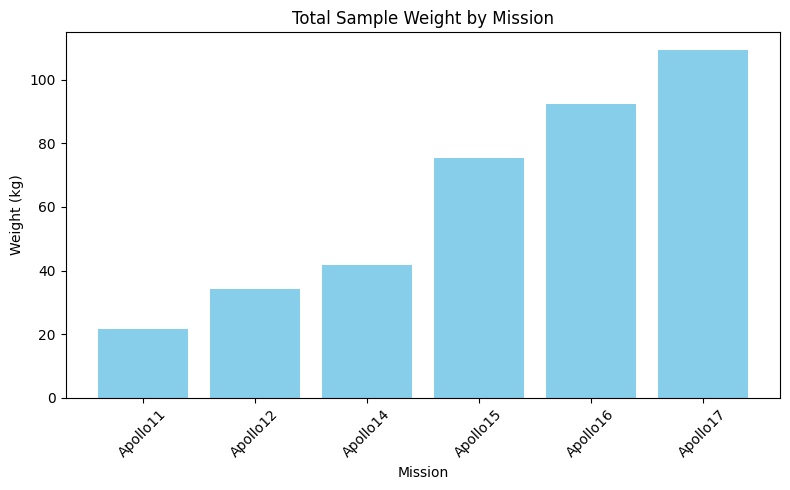

In [170]:
import matplotlib.pyplot as plt

missions = rock_samples.groupby("Mission")["Weight (kg)"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(missions["Mission"], missions["Weight (kg)"], color="skyblue")
plt.title("Total Sample Weight by Mission")
plt.xlabel("Mission")
plt.ylabel("Weight (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mission_total_weight.png")  # 이미지 저장
plt.show()


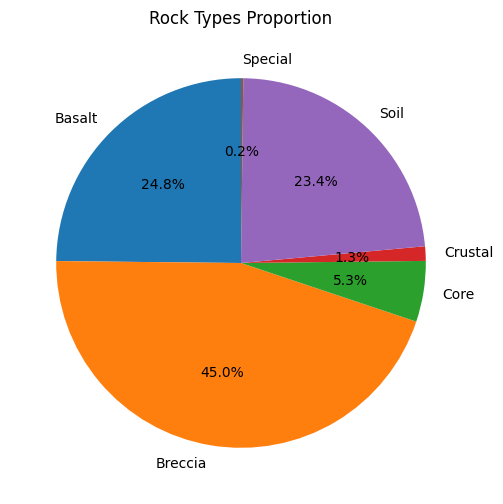

In [171]:
types = rock_samples.groupby("Type")["Weight (kg)"].sum()

plt.figure(figsize=(6,6))
plt.pie(types, labels=types.index, autopct="%.1f%%", startangle=90)
plt.title("Rock Types Proportion")
plt.savefig("rock_type_ratio.png")
plt.show()


<Figure size 800x500 with 0 Axes>

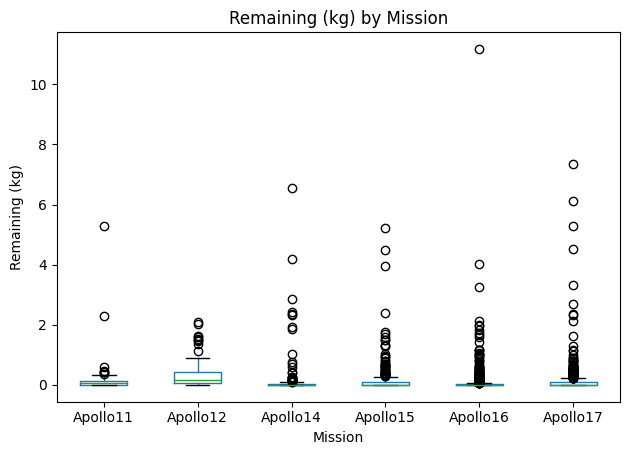

In [172]:
plt.figure(figsize=(8,5))
rock_samples.boxplot(column="Remaining (kg)", by="Mission", grid=False)
plt.title("Remaining (kg) by Mission")
plt.suptitle("")  # 상단 중복 타이틀 제거
plt.xlabel("Mission")
plt.ylabel("Remaining (kg)")
plt.tight_layout()
plt.savefig("remaining_by_mission.png")
plt.show()
